# EXPLORATION 18

# 18. 문자를 읽을 수 있는 딥러닝

* Writier : 송영석
* Date : 2021.12.01

## 서비스 기획


* 도서 사진을 입력하면 어떤 책인지 알려주는 서비스 제작

## Step1. 검증용 데이터셋 준비

In [1]:
import os
import glob
img_dir = os.getenv('HOME')+'/aiffel/ocr_python/book_test'
books = os.listdir(img_dir)
books

['test_1.jpg',
 'test_8.jpg',
 'test_7.jpg',
 'test_5.jpg',
 'test_4.jpg',
 'test_2.jpg',
 'test_6.jpg',
 'test_3.jpg']

In [2]:
images_path = glob.glob(img_dir+"/*.jpg")
images_path

['/aiffel/aiffel/ocr_python/book_test/test_1.jpg',
 '/aiffel/aiffel/ocr_python/book_test/test_8.jpg',
 '/aiffel/aiffel/ocr_python/book_test/test_7.jpg',
 '/aiffel/aiffel/ocr_python/book_test/test_5.jpg',
 '/aiffel/aiffel/ocr_python/book_test/test_4.jpg',
 '/aiffel/aiffel/ocr_python/book_test/test_2.jpg',
 '/aiffel/aiffel/ocr_python/book_test/test_6.jpg',
 '/aiffel/aiffel/ocr_python/book_test/test_3.jpg']

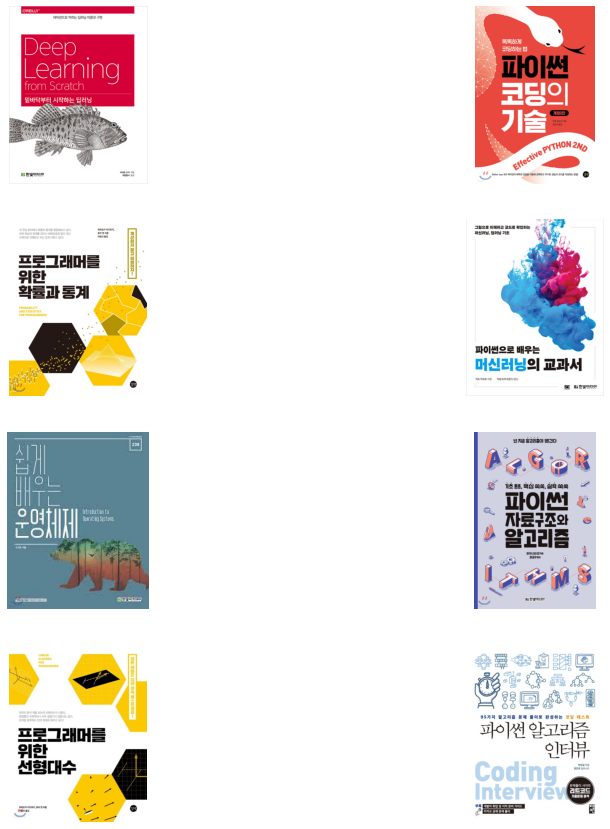

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as img


plt.figure(figsize=(15, 15))

for i, image in enumerate(images_path,1):
    plt.subplot(4, 2, i)
    plt.imshow(img.imread(image))
    plt.axis('off')

## Step2. Google OCR API, keras-ocr, Tesseract로 테스트 진행

### 1.   Google OCR API

In [4]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [5]:
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 클라우드 환경에서는 무시해도 좋습니다
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 입력 이미지 경로를 지정해 주세요.
# (예시) path = os.getenv('HOME')+'/aiffel/ocr_python/test_image.png'

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.


total 97396
-rw-r--r-- 1 root root     4645 Nov  4 13:15 attention.py
-rw-r--r-- 1 root root 12491119 Nov 25 04:42 bicubic.gif
-rw-r--r-- 1 root root    24604 Sep 27 01:42 EXPLORATION_01.ipynb
-rw-r--r-- 1 root root    34234 Oct  4 12:11 EXPLORATION_02.ipynb
-rw-r--r-- 1 root root    87217 Oct 12 14:52 EXPLORATION_04.ipynb
-rw-r--r-- 1 root root  3507546 Oct 17 05:14 EXPLORATION_05.ipynb
-rw-r--r-- 1 root root   907686 Oct 20 01:41 EXPLORATION_06.ipynb
-rw-r--r-- 1 root root   398114 Oct 28 14:10 EXPLORATION_07.ipynb
-rw-r--r-- 1 root root  3955610 Nov  7 13:53 EXPLORATION_08.ipynb
-rw-r--r-- 1 root root    58239 Nov  2 14:45 EXPLORATION_09.ipynb
-rw-r--r-- 1 root root   132001 Nov  4 14:38 EXPLORATION_10.ipynb
-rw-r--r-- 1 root root   287004 Nov  9 12:58 EXPLORATION_11.ipynb
-rw-r--r-- 1 root root   100114 Nov 15 07:41 EXPLORATION_12.ipynb
-rw-r--r-- 1 root root  9152059 Nov 16 11:22 EXPLORATION_13.ipynb
-rw-r--r-- 1 root root  1129154 Nov 18 13:30 EXPLORATION_14.ipynb
-rw-r--r-- 1 ro

In [6]:

for i in books:
    print(f'[{i}]')
    detect_text(os.path.join(img_dir, i))
    print()

[test_1.jpg]
Texts:

"O'REILLY
파이썬으로 익히는 딥러닝 이론과 구현
Deep
Learning
| from Scratch
밑바닥부터 시작하는 딥러닝
사이토 고기 지음
HB 힌빛미디이
"

"O'REILLY"

"파이썬"

"으로"

"익히는"

"딥"

"러닝"

"이론"

"과"

"구현"

"Deep"

"Learning"

"|"

"from"

"Scratch"

"밑바닥"

"부터"

"시작"

"하는"

"딥"

"러닝"

"사이토"

"고기"

"지음"

"HB"

"힌빛"

"미디이"
bounds: (74,479),(100,479),(100,491),(74,491)

[test_8.jpg]
Texts:

"똑똑하게
코딩하는 법
파이썬
코딩의
기술
개정2판
브렛 슬라킨 지음
오현석 옮김
2ND
Effective PYTHON
Better way 90! 파이썬의 매력과 강점을 이용해 강력하고 우수한 성능의 코드를 작성하는 방법!
YES24
"

"똑똑"

"하게"

"코딩"

"하는"

"법"

"파이썬"

"코딩"

"의"

"기술"

"개정"

"2"

"판"

"브렛"

"슬라"

"킨"

"지음"

"오현석"

"옮김"

"2ND"

"Effective"

"PYTHON"

"Better"

"way"

"90"

"!"

"파이썬"

"의"

"매력"

"과"

"강점"

"을"

"이용해"

"강력"

"하고"

"우수한"

"성능"

"의"

"코드"

"를"

"작성"

"하는"

"방법"

"!"

"YES24"
bounds: (16,1171),(60,1170),(60,1183),(16,1184)

[test_7.jpg]
Texts:

"내 관심 분야에서 확률과 통계를 활용해보고 싶다.
여러 현상의 관계를 감이나 애매모호한 말이 아닌
수학으로 이해하고 자신 있게 다루고 싶다!
히라오카 카즈유키,
호리 겐 지음
이창신 옮김
프로그래머를
위한
확률과 통계
PROBABILITY
AND STATISTICS
FOR PRO

## 2.keras-ocr

In [7]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [8]:
# 테스트에 사용할 이미지 
images = [keras_ocr.tools.read(os.path.join(img_dir, i)) for i in books]
prediction_groups = [pipeline.recognize([os.path.join(img_dir, i)]) for i in books]

/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


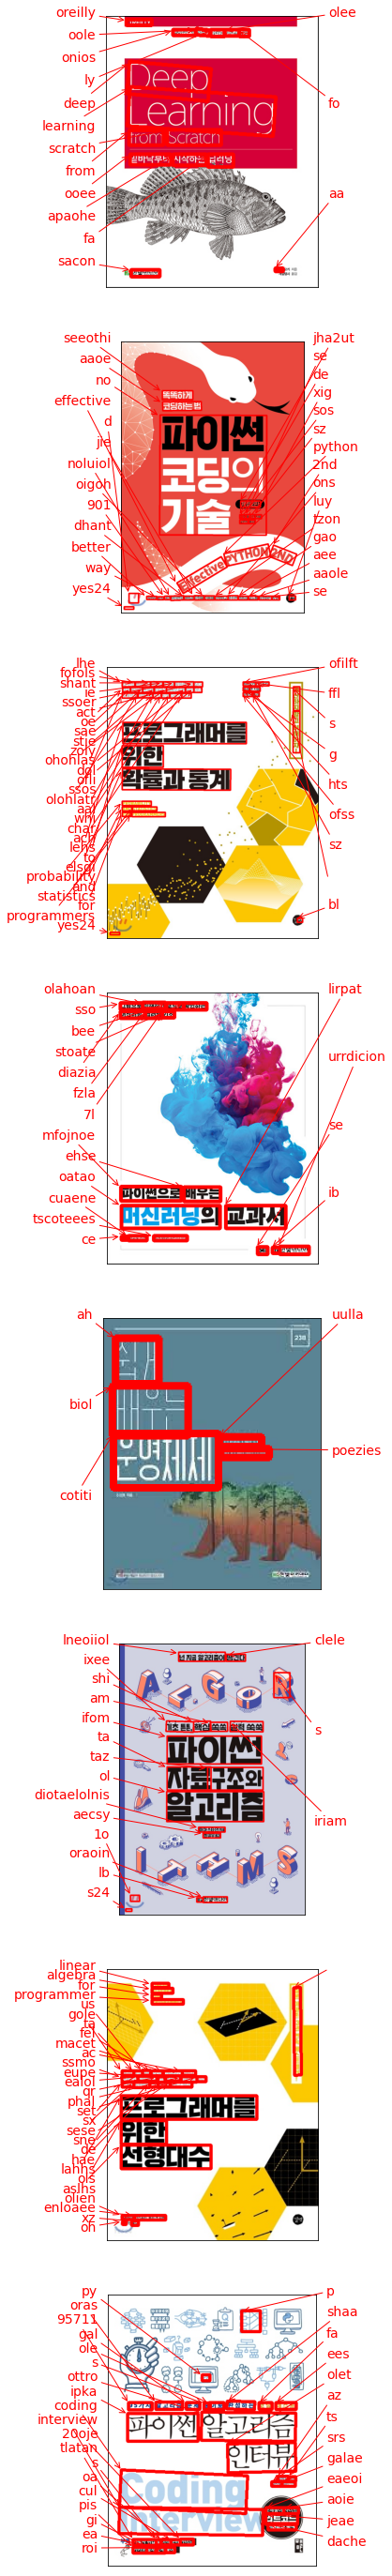

In [9]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(50, 50))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

## 3. Tesseract

In [14]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.


In [20]:
def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [21]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/book_test'
img_file_path = work_dir + '/test_1.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/book_test/0000.png
/aiffel/aiffel/ocr_python/book_test/0001.png
/aiffel/aiffel/ocr_python/book_test/0002.png
/aiffel/aiffel/ocr_python/book_test/0003.png
/aiffel/aiffel/ocr_python/book_test/0004.png
/aiffel/aiffel/ocr_python/book_test/0005.png
/aiffel/aiffel/ocr_python/book_test/0006.png
/aiffel/aiffel/ocr_python/book_test/0007.png
/aiffel/aiffel/ocr_python/book_test/0008.png
/aiffel/aiffel/ocr_python/book_test/0009.png
/aiffel/aiffel/ocr_python/book_test/0010.png
/aiffel/aiffel/ocr_python/book_test/0011.png
/aiffel/aiffel/ocr_python/book_test/0012.png
/aiffel/aiffel/ocr_python/book_test/0013.png
/aiffel/aiffel/ocr_python/book_test/0014.png
/aiffel/aiffel/ocr_python/book_test/0015.png
/aiffel/aiffel/ocr_python/book_test/0016.png
/aiffel/aiffel/ocr_python/book_test/0017.png


In [22]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")


In [23]:
# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

[08


0

2

니1

느 08

내




각이는

0

2

ㄴ

'

프과

구연


Done


In [24]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/book_test'
img_file_path = work_dir + '/test_2.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/book_test/0000.png
/aiffel/aiffel/ocr_python/book_test/0001.png
/aiffel/aiffel/ocr_python/book_test/0002.png
/aiffel/aiffel/ocr_python/book_test/0003.png
/aiffel/aiffel/ocr_python/book_test/0004.png
/aiffel/aiffel/ocr_python/book_test/0005.png
/aiffel/aiffel/ocr_python/book_test/0006.png
/aiffel/aiffel/ocr_python/book_test/0007.png
/aiffel/aiffel/ocr_python/book_test/0008.png
/aiffel/aiffel/ocr_python/book_test/0009.png
/aiffel/aiffel/ocr_python/book_test/0010.png
/aiffel/aiffel/ocr_python/book_test/0011.png
/aiffel/aiffel/ocr_python/book_test/0012.png
/aiffel/aiffel/ocr_python/book_test/0013.png
/aiffel/aiffel/ocr_python/book_test/0014.png
/aiffel/aiffel/ocr_python/book_test/0015.png
/aiffel/aiffel/ocr_python/book_test/0016.png
/aiffel/aiffel/ocr_python/book_test/0017.png
/aiffel/aiffel/ocr_python/book_test/0018.png
/aiffel/aiffel/ocr_python/book_test/0019.png
/aiffel/aiffel/ocr_python/book_test/0020.png
/aiffel/aiffel/ocr_python/book_test/0021.png
/aiffel/ai

In [25]:
recognize_images(cropped_image_path_list)

녀

)

=


그

기

즈(|

[ |

00 바[

「



기즈

빼

로


션

스

쓰

1]

실


스쑤

[ |


개

]!조 1

에


7

트

이즈

그

01

) [

74:

그!


Done


## Step3. 테스트 결과 정리

###  Google OCR API

In [32]:
detect_text(os.path.join(img_dir,'test_4.jpg'))

Texts:

"230
OL
운영제제
atrehetasti
retey etens
"

"230"

"OL"

"운영"

"제제"

"atrehetasti"

"retey"

"etens"
bounds: (131,120),(150,120),(150,127),(131,127)


###  keras-ocr 

<AxesSubplot:>

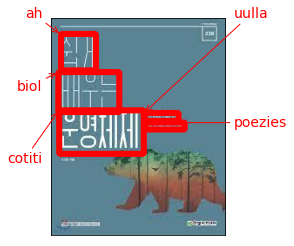

In [31]:
keras_ocr.tools.drawAnnotations(image=images[4],predictions=prediction_groups[4][0])

### Tesseract

In [33]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/book_test'
img_file_path = work_dir + '/test_4.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list_test = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/book_test/0000.png


In [34]:
recognize_images(cropped_image_path_list_test)

"

Done


## Step4. 결과 분석과 결론 제시

### 1. 서비스의 목적과 내용

책의 이미지를 통해 자신이 관심있어하는 분야의 책이고 공부할만한 책인지를 문자인식으로 알아볼수 있습니다.   
연관 단어가 들어가 있는지 OCR을 통해 미리 알면 좋을 것 같습니다.  
또는 책을 사진 찍는 것 만으로도 검색이 되게끔 하는 서비스 또한 편리함을 줄 수 있을것 같습니다.

### 2. 검토한 OCR 모델들이 그 목적에 부합하는지 확인하기 위해 필요한 평가 기준을 제시

현재로는 Google OCR api가 가장 적합한 것 같습니다. 비록 부분부분 쪼개져서 출력되지만 저정도의 자료만으로도 검색을 충분히 해내어 책 사진을 찍는 것만으로도 검색을 하거나 공부하고자하는 분야와 연관된 책인지 충분히 알아낼 수 있을 것 같습니다.  
keras-ocr은 글자 인식 자체는 좋지만 한국어로 나타내거나 문자열 자체를 가져오는것에는 약해보이고  
Tesseract는 문자열은 가져올 수 있으나 crop되는 영역이 부정확한것 같습니다. 추후에 더욱 연구가 필요해 보입니다.  


### 3. 모델선정  
**Google OCR api**를 서비스 이용에 선정

# 회고


1. keras - ocr또한 쓰임새가 매우 좋을 것 같은데 한국어를 제대로 왜 확인 못하는지 공부해봐야겠습니다.
2. 글자 인식 모델들도 종류가 다양하다는 것을 알았고 Tesseract가 조금 더 연구하면 쓰임새에 있어 이번 프로젝트에서 경험하고 넘어간것 보다 더 다양하게 쓸 수 있을 것 같습니다.
3. 간단히 시도해본 book 서비스 이외에도 영수증을 통해 결제 기록을 인식하여 소비패턴을 분석하는 심화도 추후에 해보면 좋을 것 같았다.